<div style="
    font-weight: bold; 
    font-size: 28px;
    ">
    Heart Disease Prediction
</div>

<br>

<div style="font-size:15px; line-height:1.8">
    
**Name**: Salman Siddiqui <br>
**Email**: SalmanSiddiqui172002@gmail.com <br>

</div>

<div style="font-size:15px; line-height:1.8">

**Introduction**

The dataset we are working with contains information about heart patients and their associated health metrics, including age, blood pressure, heart rate, and more. Our objective is to develop a predictive model to identify patients at risk of heart disease.

**Table of Content**

<ol>
    <li style="margin-bottom: 8px; font-weight: bold;">Exploratory Data Analysis (EDA)</li>
    <p>
        A. Summary Statistics <br> 
        B. Univariate Analysis <br>
        C. Bivariate Analysis <br>
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">Preprocessing Steps</li>
    <p>
        A. Remove Irrelevant Features <br> 
        B. Handle Missing Values <br>
        C. Address Outliers <br>
        D. Encode Categorical Variables <br>
        E. Feature Scaling <br>
        F. Transforming Skewed Features <br>
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">Model Building</li>
     <p>
        A. Decision Trees <br> 
        B. Random Forest<br>
        C. K-Nearest Neighbors (KNNs) <br>
        D. Support Vector Machines (SVMs) <br>
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">Model Comparision & Pipe Building</li>
     <p>
        A. Compare Models <br> 
        B. Build Pipeline <br>
    </p>
</ol>

</div>

<h2 style="font-weight: bold; font-size: 22px;">1. Exploratory Data Analysis (EDA)</h2>

<hr style="
    border: none;
    height: 1px;
    background: black;
    "> 

<div style="font-size:15px; line-height:1.8;">
    
**Relevant Libraries**

We'll import more libraries as we need them, but the following are pretty basic, so let's import them now.

</div>

In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from utils.colors import CustomColor

<div style="font-size:15px; line-height: 1.8;">

We will begin by loading the dataset. This dataset was obtained from Kaggle and can be found [here](https://www.kaggle.com/datasets/arezaei81/heartcsv).  

</div>

In [13]:
# Load in the dataset
data_RAW = pd.read_csv("assets/data/heart.csv")

# View dataset
data_RAW.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<div style="font-size:15px; line-height:1.8;">

The table below provides a summary of the dataset's columns, including the values they contain and their respective meanings.

<table>
    <tr>
        <th>Feature</th>
        <th>Description</th>
    </tr>
    <tr>
        <td><b>age</b></td>
        <td>Age of the individual (in years).</td>
    </tr>
    <tr>
        <td><b>sex</b></td>
        <td>
            Gender of the individual: <br>
            - 0 = Male <br>
            - 1 = Female <br>
        </td>
    </tr>
    <tr>
        <td><b>cp</b></td>
        <td>
            Type of chest pain: <br>
            - 0 = Typical angina <br>
            - 1 = Atypical angina <br>
            - 2 = Non-anginal pain <br>
            - 3 = Asymptomatic <br>
        </td>
    </tr>
    <tr>
        <td><b>trestbps</b></td>
        <td>Resting blood pressure (mmHg).</td>
    </tr>
    <tr>
        <td><b>chol</b></td>
        <td>Serum cholesterol level (mg/dL).</td>
    </tr>
    <tr>
        <td><b>fbs</b></td>
        <td>
            Fasting blood sugar: <br>
            - 0 = ≤120 mg/dL <br>
            - 1 = >120 mg/dL <br> 
        </td>
    </tr>
    <tr>
        <td><b>restecg</b></td>
        <td>
            Resting electrocardiogram results: <br>
            - 0 = Normal <br>
            - 1 = ST-T wave abnormality <br>
            - 2 = Probable/definite left ventricular hypertrophy by Estes' criteria <br>
        </td>
    </tr>
    <tr>
        <td><b>thalach</b></td>
        <td>Maximum heart rate achieved.</td>
    </tr>
    <tr>
        <td><b>exang</b></td>
        <td>
            Exercise-induced angina: <br>
            - 1 = Yes <br>
            - 0 = No <br>
        </td>
    </tr>
    <tr>
        <td><b>oldpeak</b></td>
        <td>ST depression induced by exercise relative to rest (in mm).</td>
    </tr>
    <tr>
        <td><b>slope</b></td>
        <td>
            Slope of the peak exercise ST segment:<br>
            - 0 = Upsloping <br>
            - 1 = Flat <br>
            - 2 = Downsloping <br>
        </td>
    </tr>
    <tr>
        <td><b>ca</b></td>
        <td>Number of major vessels (0–4) colored by fluoroscopy.</td>
    </tr>
    <tr>
        <td><b>thal</b></td>
        <td>
            Type of thalassemia: <br>
            - 0 = Normal <br>
            - 1 = Reversible defect <br>
            - 2 = Fixed defect <br>
            - 3 = Not described <br>
        </td>
    </tr>
    <tr>
        <td><b>target</b></td>
        <td>
            Presence of heart disease: <br>
            - 0 = No <br>
            - 1 = Yes <br>
        </td>
    </tr>
</table>

</div>

<div style="font-size:15px; line-height:1.8;">

When we plot charts later, the numerical encodings might not be immediately clear to the audience. To make the data more intuitive, let's create a Pandas series, <code style='font-size:14px; font-weight:bold;'>ser_feature_encodings</code>, that translates these numbers into their actual meanings. Additionally, we'll define another series, <code style='font-size:14px; font-weight:bold;'>ser_feature_titles</code>, which maps each column name to a brief description of what it represents.

</div>

In [14]:
# Mapping of categorical feature values to their real-world meanings
ser_feature_encodings = pd.Series(
    {
        # Gender
        ("sex", 0): "Male",
        ("sex", 1): "Female",
        # Chest Pain Type (cp)
        ("cp", 0): "Typical",
        ("cp", 1): "ATypical",
        ("cp", 2): "Non-anginal",
        ("cp", 3): "Asymptomatic",
        # Fasting Blood Sugar (fbs) > 120 mg/dL
        ("fbs", 0): "<= 120 mg/dL",
        ("fbs", 1): "> 120 mg/dL",
        # Resting Electrocardiogram Results (restecg)
        ("restecg", 0): "Normal",
        ("restecg", 1): "ST-T Abnormal",
        ("restecg", 2): "Left Ventricular Hypertrophy",
        # Exercise-induced Angina (exang)
        ("exang", 0): "No",
        ("exang", 1): "Yes",
        # Slope of Peak Exercise ST Segment (slope)
        ("slope", 0): "Upsloping",
        ("slope", 1): "Flat",
        ("slope", 2): "Downsloping",
        # Number of Major Vessels colored by Fluoroscopy (ca)
        ("ca", 0): "None",
        ("ca", 1): "One",
        ("ca", 2): "Two",
        ("ca", 3): "Three",
        ("ca", 4): "Four",
        # Thallium Stress Test Results (thal)
        ("thal", 0): "Normal",
        ("thal", 1): "Fixed Defect",
        ("thal", 2): "Reversible Defect",
        ("thal", 3): "Not Described",
        # Target Variable (Heart Disease Status)
        ("target", 0): "Negative",
        ("target", 1): "Positive",
    }
)

# Mapping of feature names to human-readable descriptions
ser_feature_titles = pd.Series(
    {
        "sex": "Gender",
        "cp": "Type of Chest Pain",
        "fbs": "Fasting Blood Sugar Level",
        "restecg": "Resting Electrocardiogram Results",
        "exang": "Exercise-induced Angina",
        "slope": "Slope of Peak Exercise ST Segment",
        "ca": "Number of Major Vessels (Fluoroscopy)",
        "thal": "Thallium Stress Test Results",
        "target": "Heart Disease Status",
    }
)

<div style="font-size:15px;  line-height:1.8;">

Let’s start with a brief overview of our data.

In [15]:
# Get a summary of columns
data_RAW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<div style="font-size:15px; line-height:1.8;">

**Observations**

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">Number of Entries</li>
    <p>
        - The dataset contains 303 entries, indexed from 0 to 302. <br> 
        - For a machine learning problem, this represents a relatively small dataset for model training.
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">Columns</li>
    <p>
        - There are 14 columns, each corresponding to specific attributes of health patients.
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">Data Types</li>
    <p>
        - All columns except one are of type <code style='font-size:14px; font-weight:bold;'>int64</code>. <br>
        - The exception is the <b>oldpeak</b> column, which is of type <code style='font-size:14px; font-weight:bold;'>float64</code>.
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">Missing Values</li>
    <p>
        - There are no missing values, as all columns have 303 valid entries. <br>
    </p>
</ul>

</div>

<div style="font-size:15px; line-height:1.8;">

**Note**: Based on the data types and the feature explanations provided earlier, we can conclude that 9 columns (<code style='font-size:14px; font-weight:bold;'>sex, cp, fbs, restecg, exang, slope, ca, thal, target</code>) are numerical in terms of their data types but represent categorical values semantically. To ensure correct analysis and results, these columns should be converted to a different data type (e.g., <code style='font-size:14px; font-weight:bold;'>string</code>).

</div>

In [16]:
# Get all column names from the dataset
features = data_RAW.columns

# Define the continuous features
features_num = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Identify categorical features
features_cat = [feature for feature in features if feature not in features_num]

# Convert discrete features to object type for categorical processing
data_EDA = data_RAW.copy()
data_EDA[features_cat] = data_EDA[features_cat].astype("object")

# Display updated data types
data_EDA.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

<h3 style="font-weight: bold; font-size: 18px">A. Summary Statistics</h3>

<div style="font-size:15px; line-height:1.8;">

First, let’s explore the summary statistics of our numerical attributes.

</div>

In [17]:
# Generate summary statistics for numerical columns:
temp = data_EDA.describe()

# Round all numerical values to two decimal places for better readability.
temp = temp.round(2)

# Switche rows and columns, making it easier to read.
temp = temp.transpose()

# View
temp

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.37,9.08,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.62,17.54,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.26,51.83,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.65,22.91,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.04,1.16,0.0,0.0,0.8,1.6,6.2


<div style="font-size:15px; line-height:1.8;">

**Observations**

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br>
        - ... <br>
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br>
        - ... <br>
    </p>
</ul>

</div>

<div style="font-size:15px; line-height:1.8;">
    
Next, let's examine our categorical features.

</div>

In [18]:
# Get the descriptive statistics of categorical columns
temp = data_EDA.describe(include=object)

# View
temp

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


<div style="font-size:15px; line-height:1.8;">

**Observations**

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br>
        - ... <br>
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br>
        - ... <br>
    </p>
</ul>

</div>

<h3 style="font-weight: bold; font-size: 18px;">B. Univariate Analysis</h3>

<div style="font-size:15px; line-height:1.8;">
    
In this section, we'll focus on individual features as standalone variables and visualize their distributions. Let's begin with continuous features. We'll use histograms to visualize the distribution, central tendency, spread, and shape of the feature.

</div>

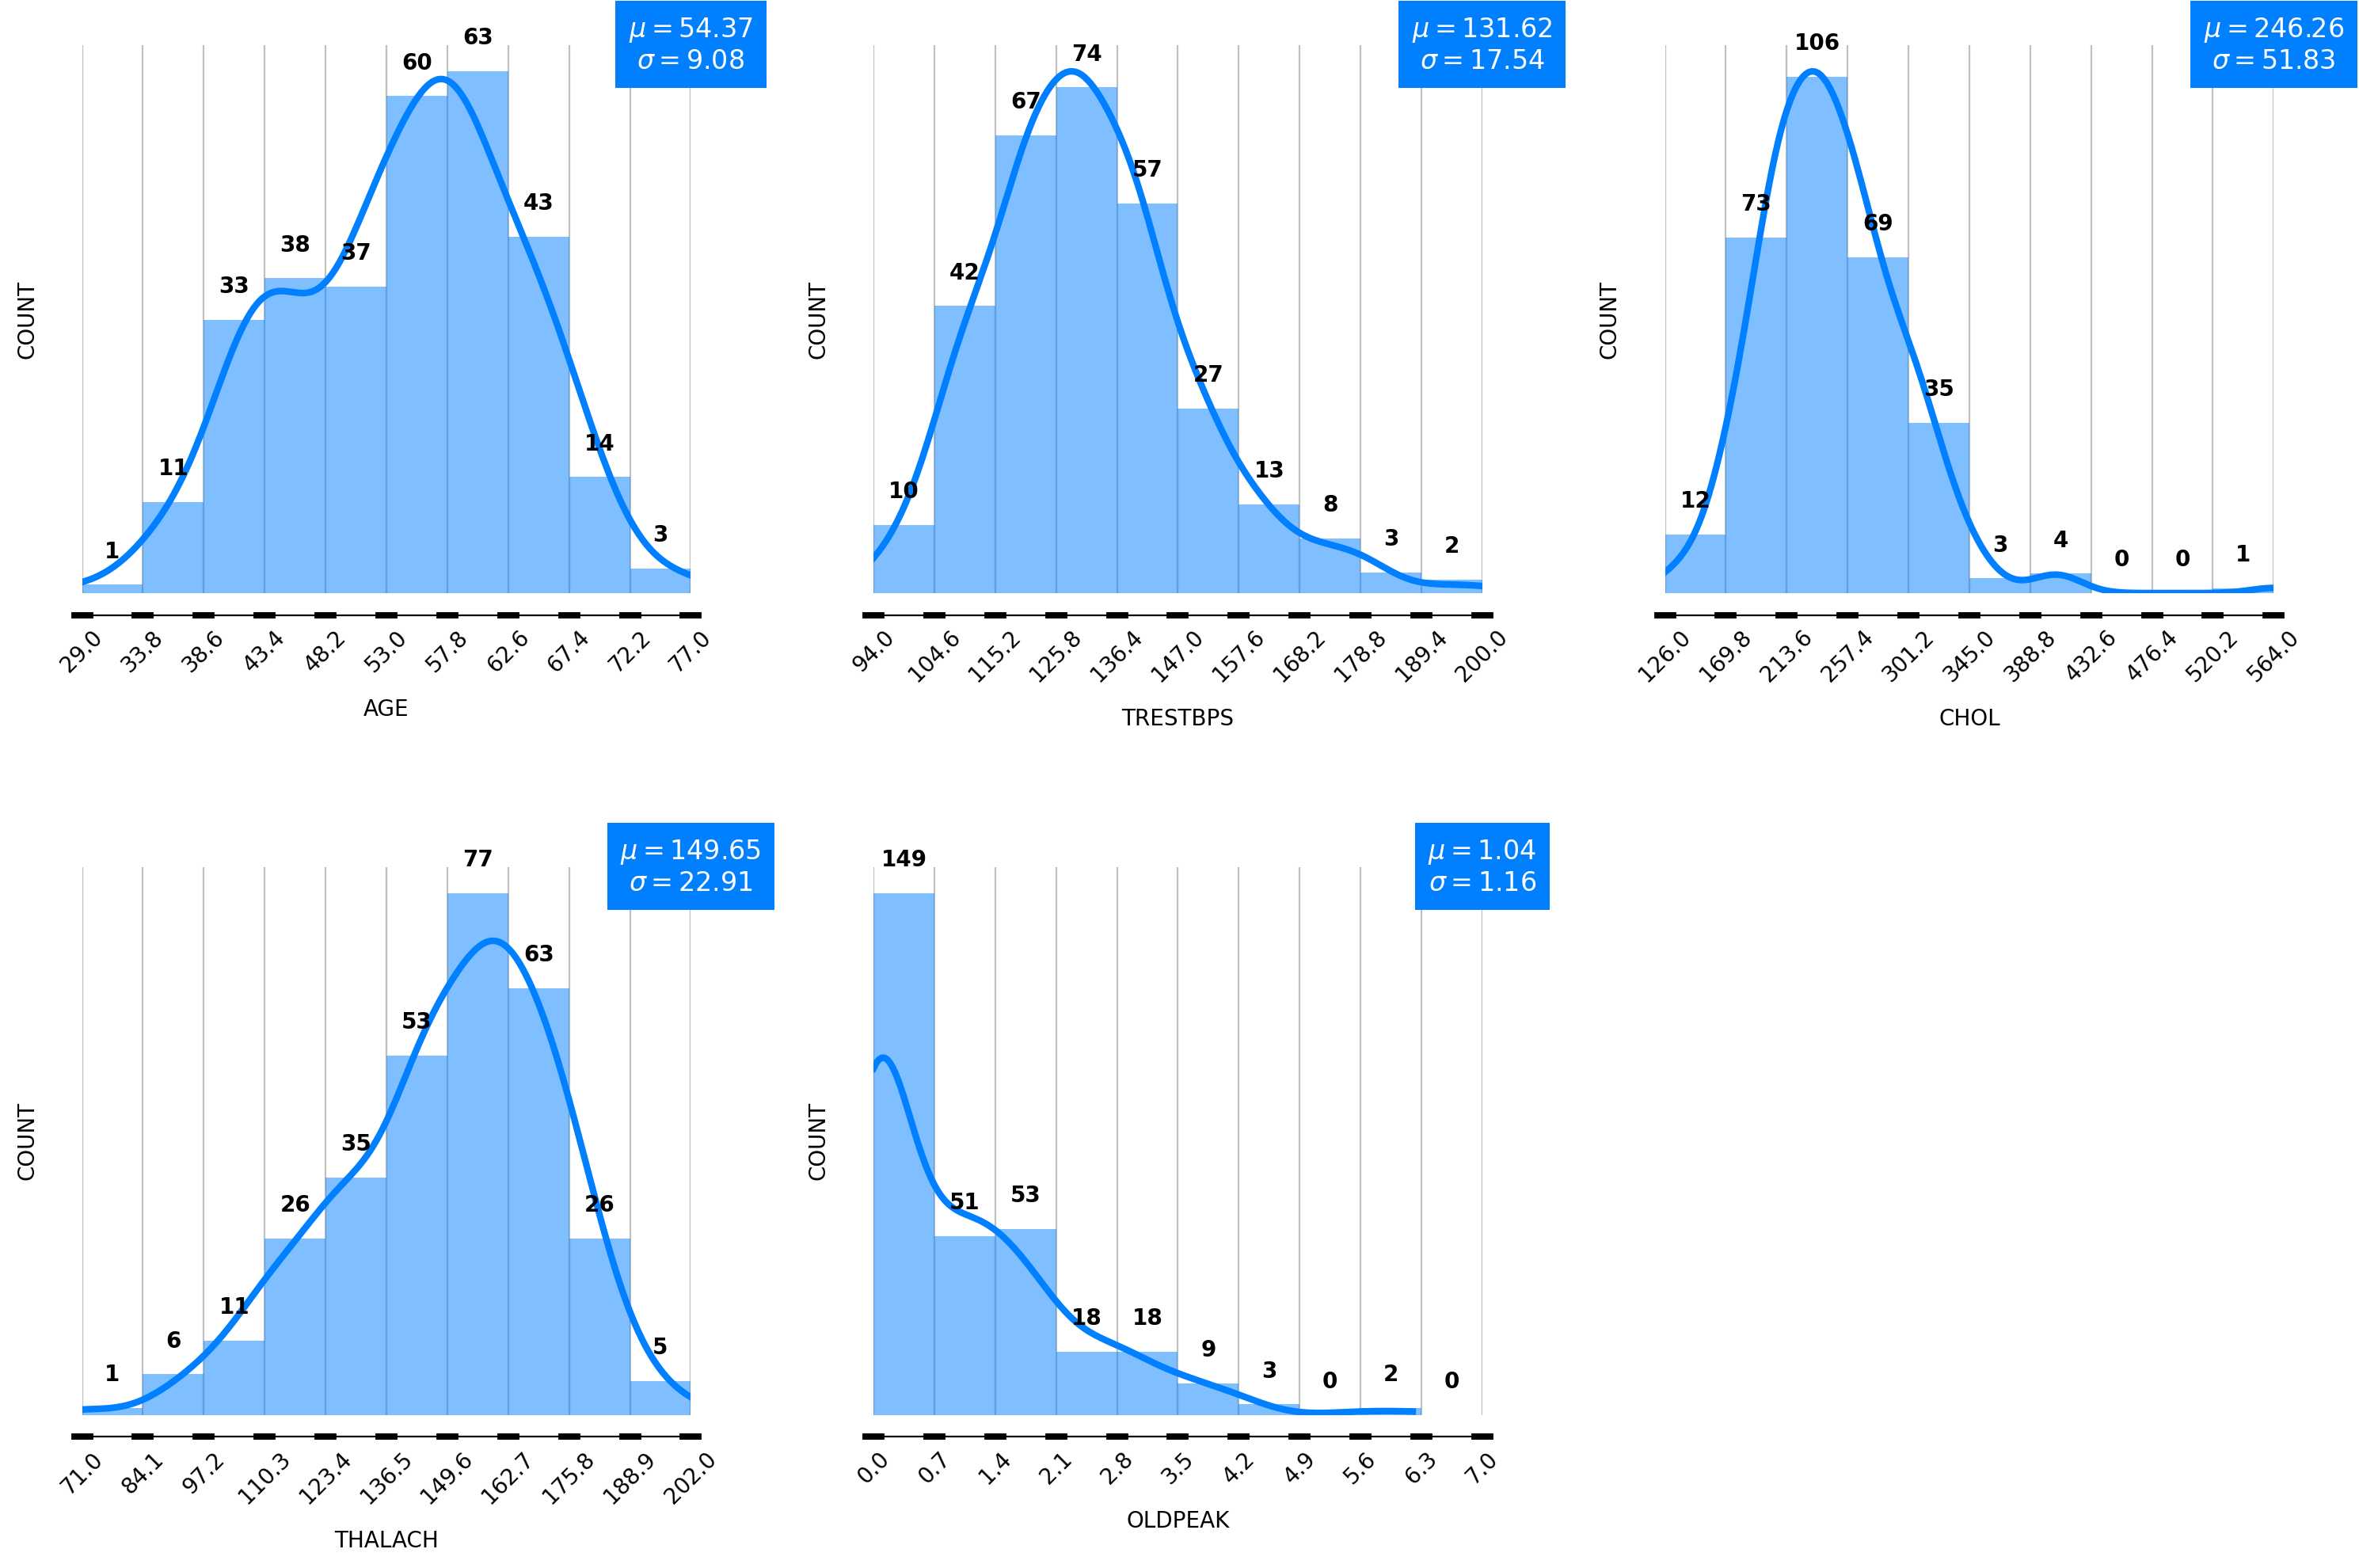

In [19]:
# Set up the figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), dpi=200)

# Loop through the continuous numerical features and create histograms
for feature, ax in zip(features_num, axes.flatten()):
    # Extract the relevant numerical data
    data = data_EDA[feature]

    # Compute histogram bin edges
    _, bin_edges = np.histogram(data, range=(np.floor(data.min()), np.ceil(data.max())))

    # Create histogram plot w/ KDE
    sns.histplot(
        data=data,
        bins=bin_edges,
        kde=True,
        color=CustomColor.blue,
        edgecolor="none",
        line_kws=dict(lw=3),
        ax=ax,
    )

    # Label histogram bars with their respective counts
    ax.bar_label(*ax.containers, padding=10, fontweight="bold", fontsize=10)

    # Calculate and annotate mean and standard deviation on the plot
    mean = data.mean()
    std = data.std()
    text = f"$\mu=${mean:.2f}\n$\sigma=${std:.2f}"

    ax.text(
        x=1,
        y=1,
        s=text,
        color="white",
        fontsize=12,
        transform=ax.transAxes,
        ha="center",
        va="center",
        bbox=dict(boxstyle="square", linewidth=0, pad=0.5, color=CustomColor.blue),
    )

    # Set axis labels
    ax.set_xlabel(feature.upper(), labelpad=10)
    ax.set_ylabel("COUNT", labelpad=20)

    # Adjust plot spines
    ax.spines[["top", "right", "left"]].set_visible(False)
    ax.spines["bottom"].set_position(("outward", 10))

    # Set axis bounds
    ax.set_xbound(lower=np.floor(bin_edges.min()), upper=np.ceil(bin_edges.max()))
    ax.set_yticks([], [])

    # Set x-axis tick positions and labels
    ax.set_xticks(np.round(bin_edges, 1))
    ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), rotation=45)

    # Customize tick appearance
    ax.tick_params(direction="inout", length=3, width=10)

    # Add gridlines
    ax.grid(color=CustomColor.silver)
    ax.set_axisbelow(True)

# Turn off the last subplot
axes.flatten()[-1].axis("off")

# Make sure there is not overlap between subplots
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Render the figure
plt.show()

<div style="font-size:15px; line-height:1.8;">

**Observations**

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ...  <br>
        - ...  <br>
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ...  <br>
        - ...  <br>
    </p>
</ul>

</div>

<div style="font-size:15px; line-height:1.8;">

Next, let's dive into categorical features. To make things clearer, we'll use bar charts to visually represent the frequency of each unique value within these features.

</div>

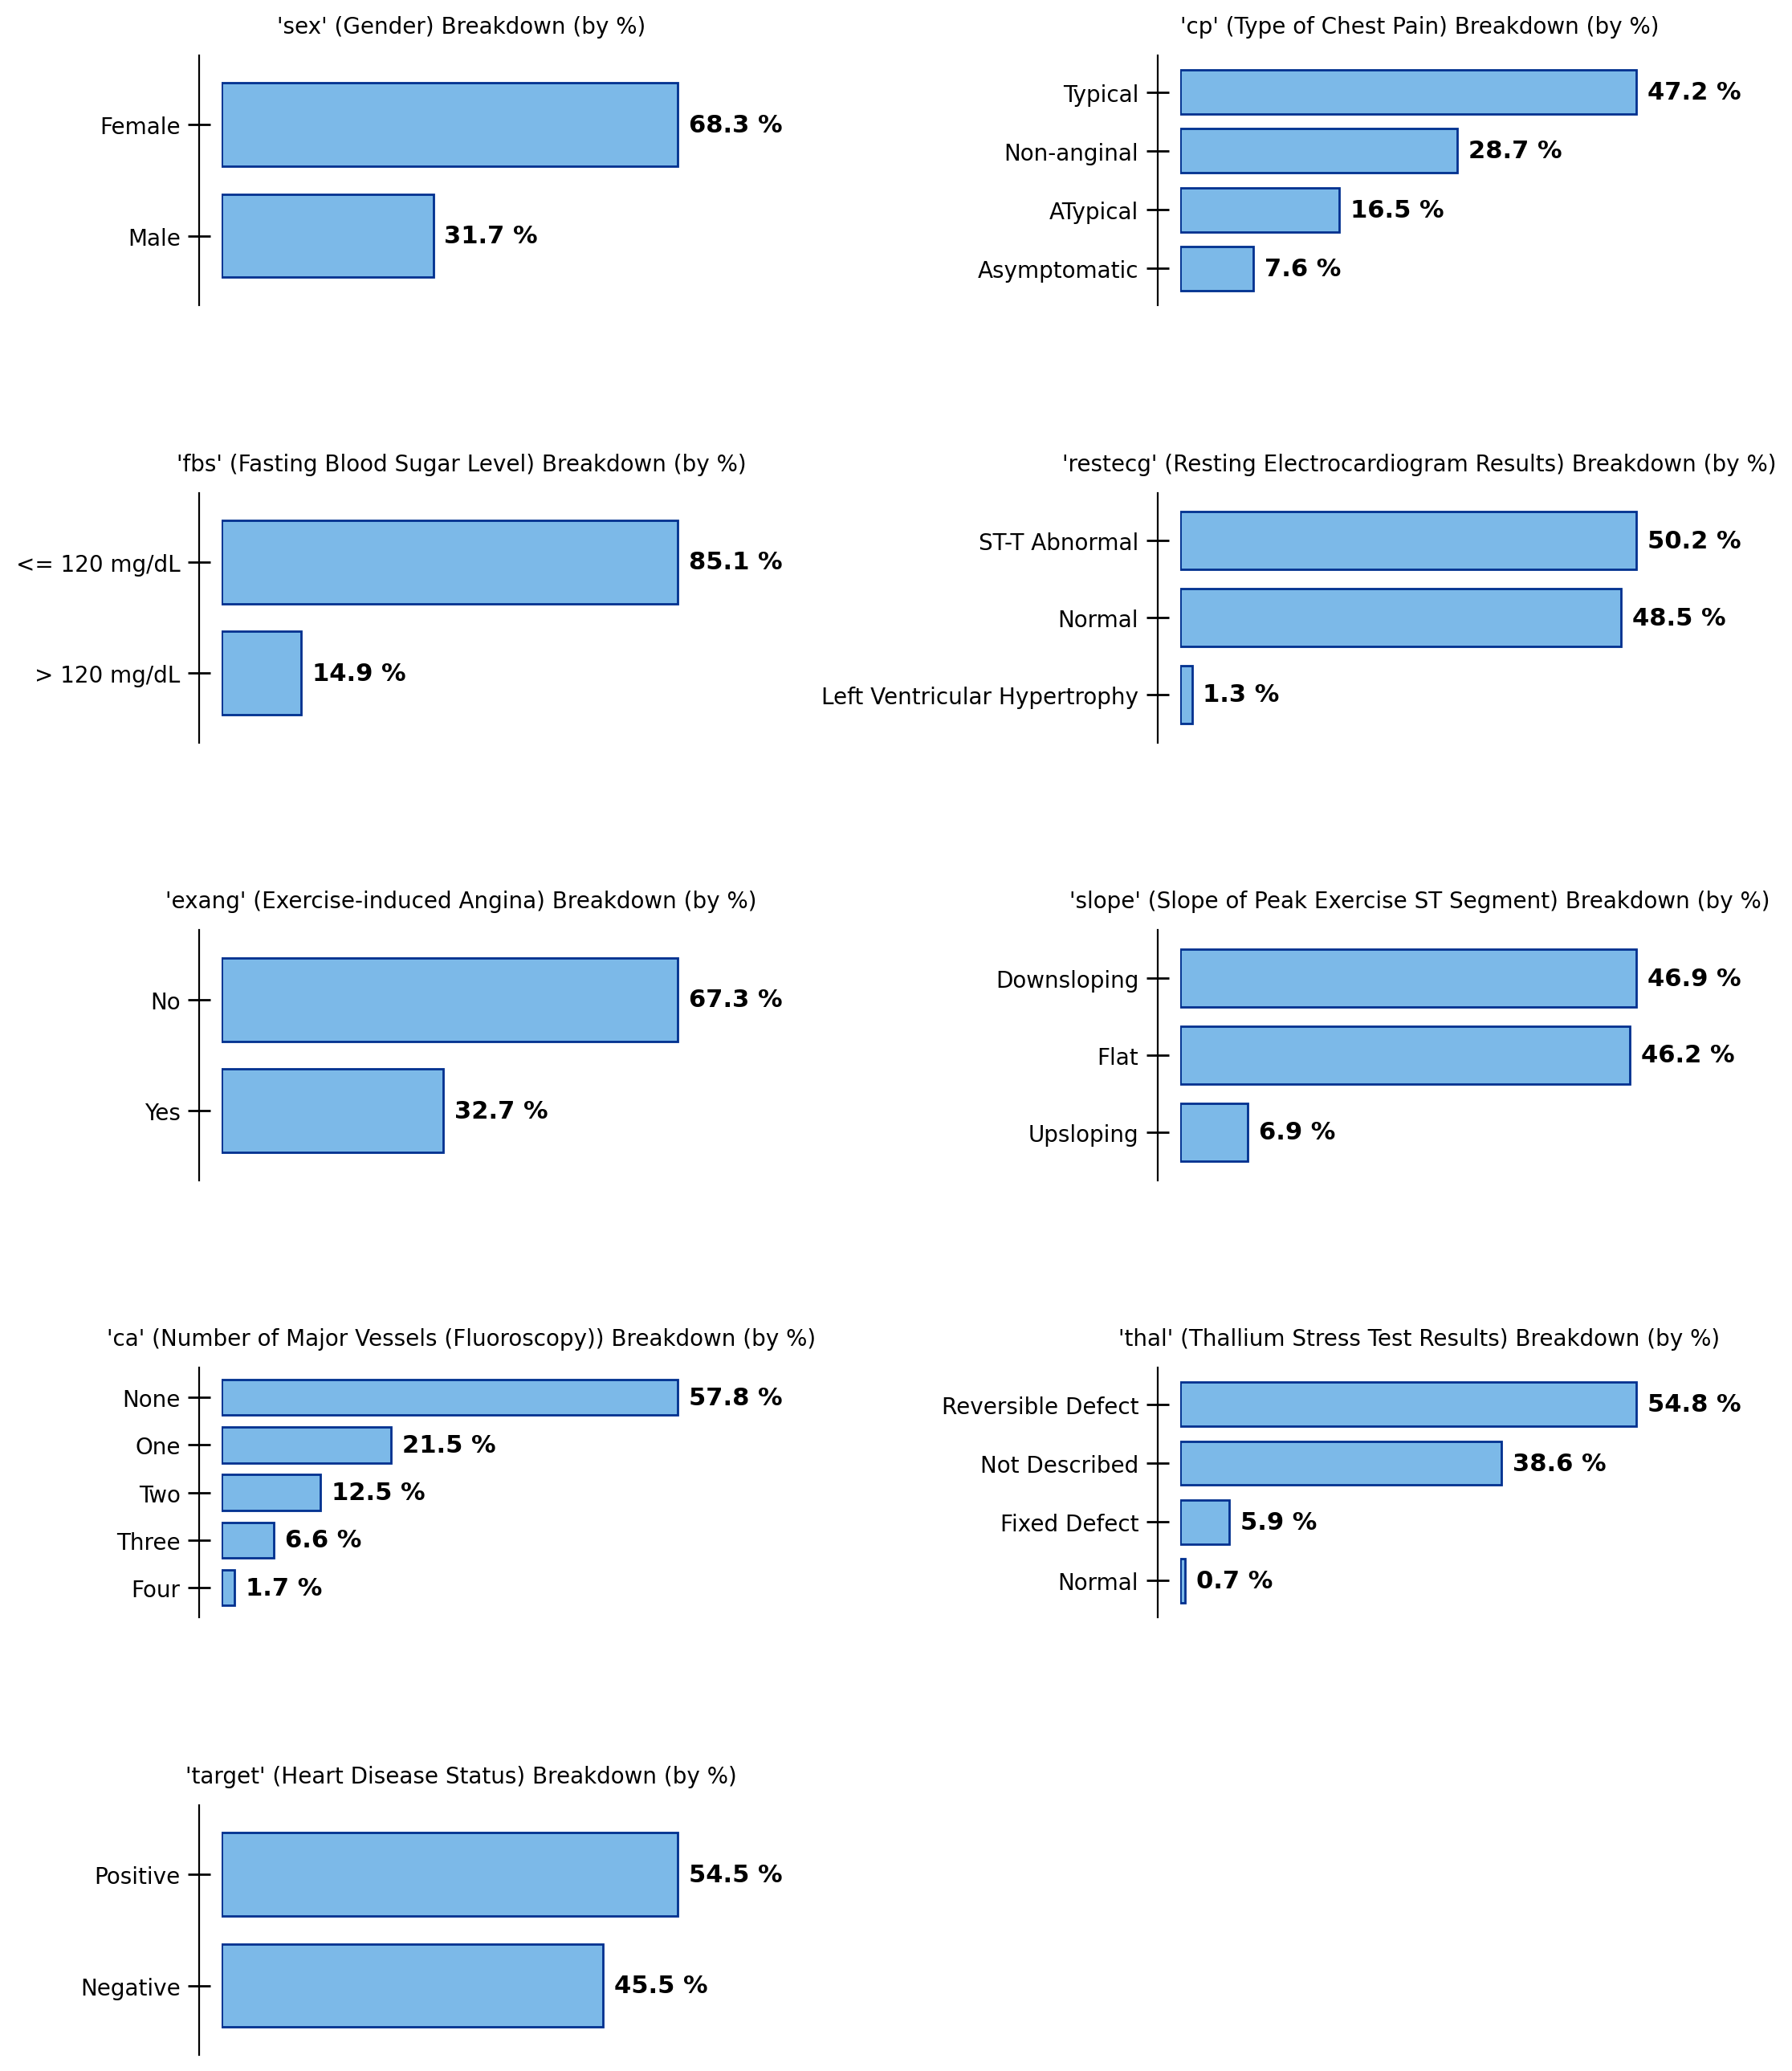

In [20]:
# Set up the figure
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(11, 13), dpi=200)

# Loop through the categorical features and plot their distributions
for feature, ax in zip(features_cat, axes.flatten()):
    # Extract the relevant categorical data
    data = data_EDA[feature]

    # Create a horizontal bar plot
    frequency_counts = data.value_counts(normalize=True).mul(100)
    frequency_counts.plot(kind="barh", width=0.75, ax=ax)

    # Update the y-axis tick labels with the corresponding meaning
    labels = ser_feature_encodings[feature][frequency_counts.index].values
    ax.set_yticks(ticks=ax.get_yticks(), labels=labels)

    # Invert the y-axis
    ax.invert_yaxis()

    # Add percentage labels to the bars
    ax.bar_label(*ax.containers, padding=5, fmt=lambda val: f"{val:.1f} %", fontweight="bold", fontsize=11)

    # Set the title for the plot and remove default axis labels
    ax.set_title(f"'{feature}' ({ser_feature_titles[feature]}) Breakdown (by %)", fontsize=10, pad=10)
    ax.set_ylabel("")
    ax.set_xlabel("")

    # Remove the spines (border lines)
    ax.spines[["top", "right", "bottom"]].set_visible(False)

    # Position the left spine 10px to the left
    ax.spines["left"].set_position(("outward", 10))

    # Remove x-axis ticks and labels
    ax.set_xticks([], [])

    # Adjust the style of ticks on the y-axis
    ax.tick_params(direction="inout", length=10, width=1)

    # Adjust the color of the bars
    for bar in ax.patches:
        bar.set_facecolor("#7CB9E8")
        bar.set_edgecolor("#00308F")

# Hide the last unused axis
axes.flatten()[-1].set_visible(False)

# Prevent overlaps between subplots
plt.tight_layout()

# Adjust vertical and horizontal spacing between subplots
plt.subplots_adjust(hspace=0.75, wspace=1.0)

# Render the figure
plt.show()

<div style="font-size:15px; line-height:1.8;">

**Observations**

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ...  <br>
        - ...  <br>
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ...  <br>
        - ...  <br>
    </p>
</ul>

</div>

<h3 style="font-weight: bold; font-size: 18px;">C. Bivariate Analysis</h3>

<div style="font-size:15px; line-height:1.8;">
    
In this section, we'll explore how each individual feature relates to the target variable. This analysis is crucial for identifying key predictors of heart disease.

We'll start with continuous features. To visualize the data, we'll use bar plots to show the average value of each feature for each target class. On top of that, we'll overlay distribution functions to compare how the feature distributions differ across the target classes. This will give us a clearer picture of which features have the most impact on predicting heart disease.

</div>

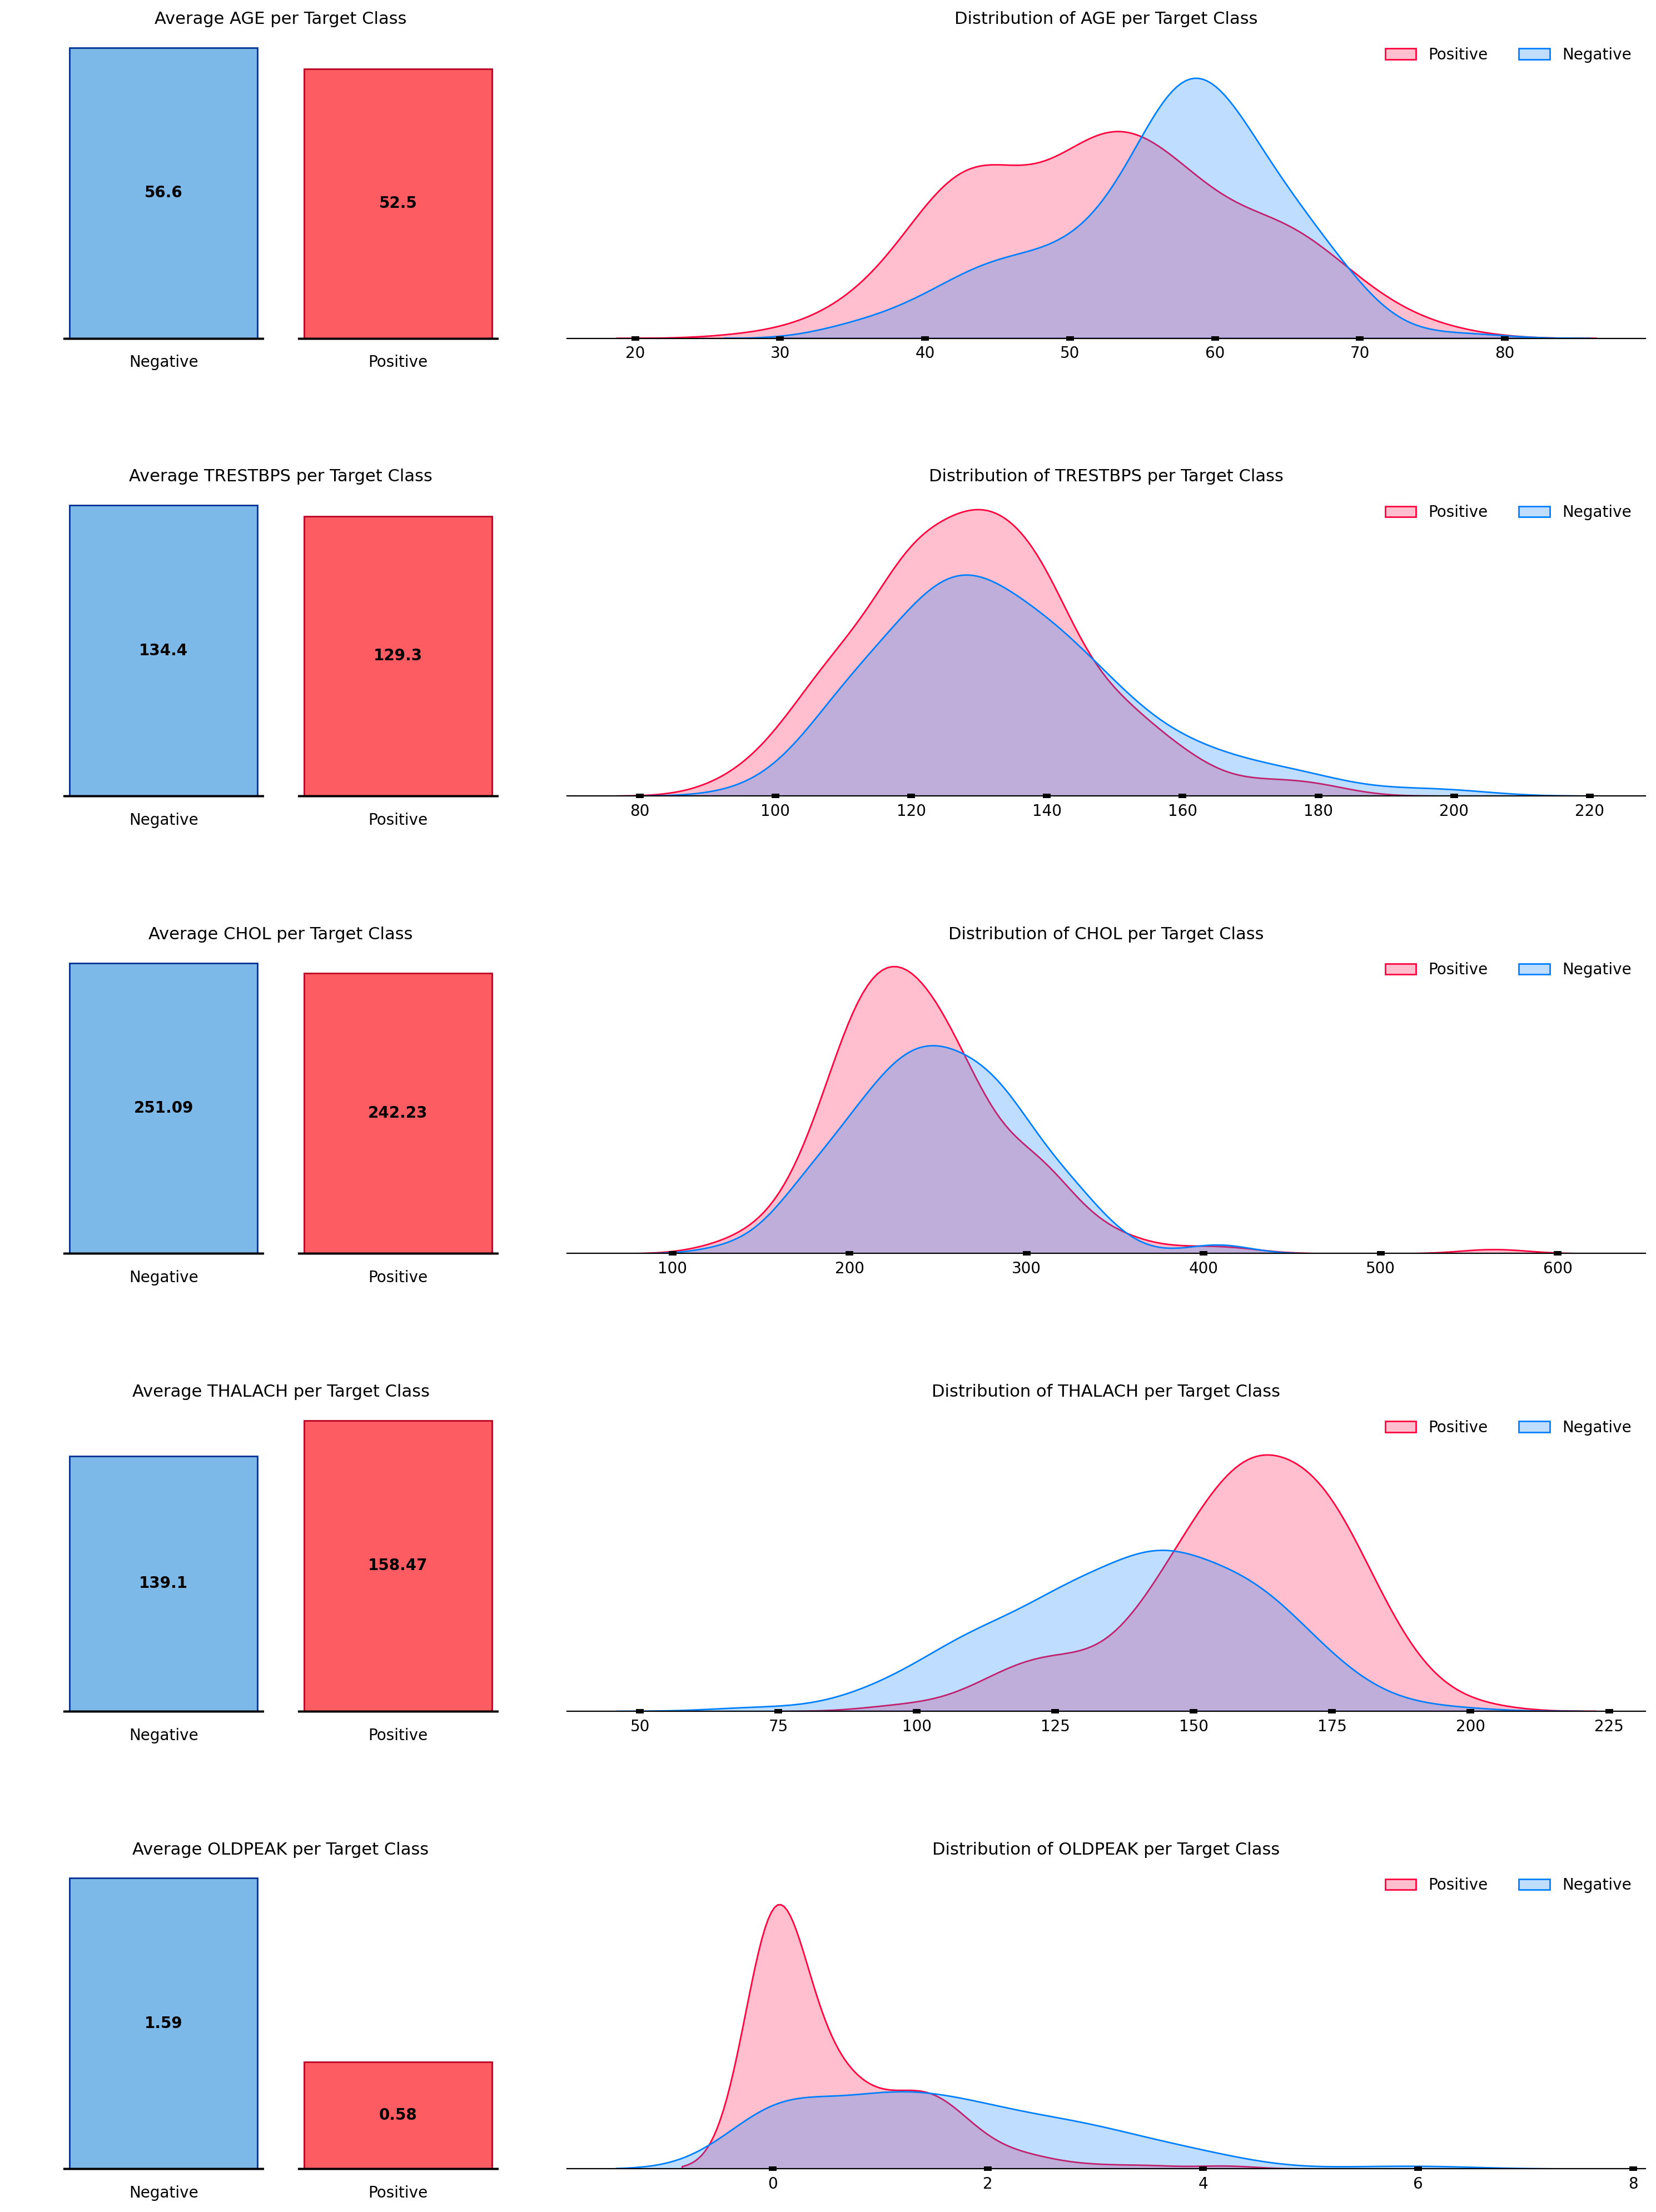

In [21]:
# Set up the figure
fig, axes = plt.subplots(
    nrows=5,
    ncols=2,
    figsize=(15, 20),
    dpi=200,
    gridspec_kw=dict(width_ratios=[1, 2]),  # Ratio between left and right plot width
)

# Extract mean of each feature with respect to target variable
data = pd.concat([data_EDA[features_num], data_EDA["target"]], axis="columns").groupby("target").mean()

# Loop through each continuous feature and create the plots
for feature, ax in zip(features_num, axes):
    ax_left, ax_right = ax  # Unpack left and right axes for the current feature

    # Left axes: Bar plot showing the average value of the feature per target class
    data[feature].plot(
        kind="bar",
        color=["#7CB9E8", "#fd5c63"],
        edgecolor=["#00308F", "#BA0021"],
        width=0.8,
        ax=ax_left,
    )

    # Update x-axis tick labels
    ax_left.set_xticks(ax_left.get_xticks(), ["Negative", "Positive"], rotation=0)

    # Remove all spines
    ax_left.spines[["left", "top", "right", "bottom"]].set_visible(False)

    # Remove y-axis ticks and labels
    ax_left.set_yticks([], [])

    # Set the labels and title for the left plot
    ax_left.set_xlabel("")
    ax_left.set_ylabel("")
    ax_left.set_title(f"Average {feature.upper()} per Target Class", fontsize=11)

    # Customize tick parameters for x-axis
    ax_left.tick_params(direction="inout", length=1.5, width=130, pad=10)

    # Add labels to the bars
    ax_left.bar_label(*ax_left.containers, fmt=lambda x: x.round(2), label_type="center", fontweight="bold")

    # Right axes: KDE plot showing the distribution of the feature for each target class
    sns.kdeplot(
        data=data_EDA,
        x=feature,
        hue="target",
        palette=["#007FFF", "#FF033E"],
        fill=True,
        ax=ax_right,
    )

    # Update the legend for the right plot
    handles, labels = ax_right.get_legend_handles_labels()
    ax_right.legend(labels=["Positive", "Negative"], frameon=False, ncols=2)

    # Remove spines from the right plot
    ax_right.spines[["top", "right", "left"]].set_visible(False)

    # Adjust tick parameters on the right plot
    ax_right.tick_params(direction="inout", length=3, width=5)

    # Set the y-bound of the right plot to match the data range
    ax_right.set_ybound(ax_right.get_yticks()[[0, -1]])

    # Set the title and labels for the right plot
    ax_right.set_title(f"Distribution of {feature.upper()} per Target Class", fontsize=11)
    ax_right.set_xlabel("")
    ax_right.set_ylabel("")

    # Remove y-axis ticks for the right plot
    ax_right.set_yticks([], [])

# Ensure the layout is tight to avoid overlapping subplots
plt.tight_layout()

# Increase vertical spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Render the figure
plt.show()

<div style="font-size:15px; line-height:1.8;">

**Observations**

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br> 
        - ...
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br>
        - ...
    </p>
</ul>

</div>

<div style="font-size:15px; line-height:1.8;">
    
For categorical features, let's create a stacked plot to visualize the proportion of each category across the two target classes. We'll also include exact counts and percentages for better clarity.

</div>

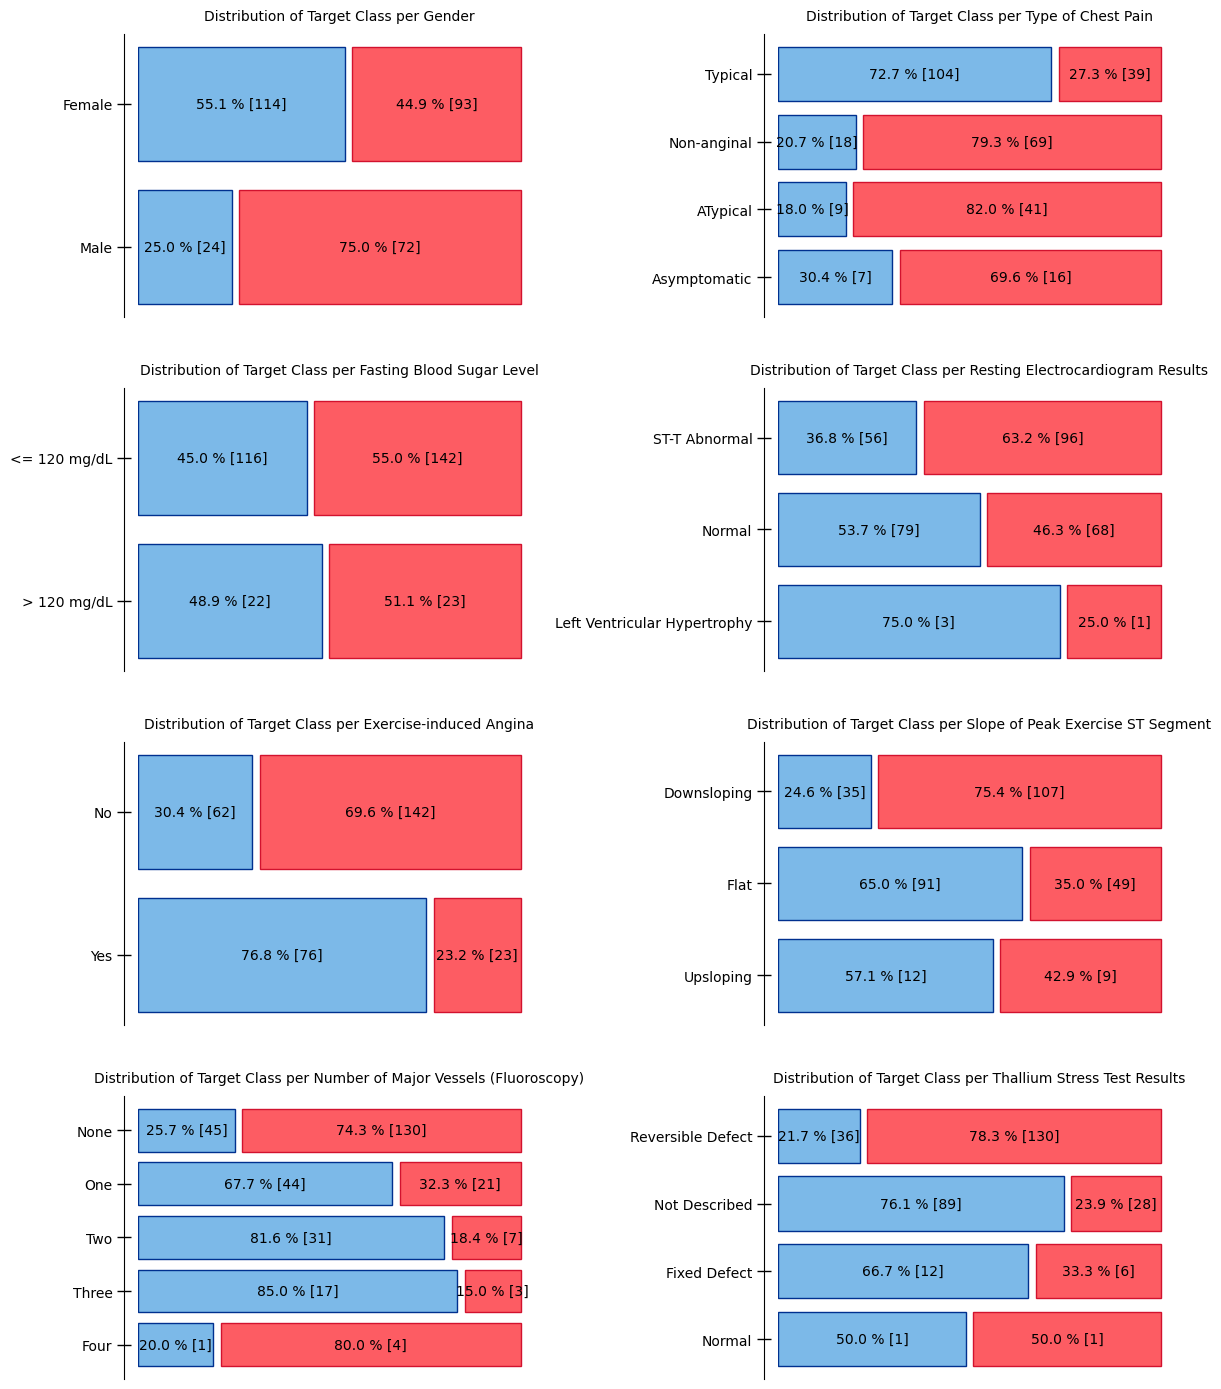

In [22]:
# Setup the figure
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(12, 14))

# Loop through the features and create the plots
for ax, feature in zip(axes.flatten(), features_cat[:-1]):
    # Group the data by feature and target, then calculate the size (counts) for each combination
    data = data_EDA.groupby([feature, "target"]).size()

    # Calculate the sum of counts for each feature value
    sums = data.groupby(feature).sum().sort_values(ascending=False)

    # Calculate the ratios of counts relative to the total count for each feature value
    ratios = data / sums

    # Reindex data and ratios according to the feature's sorted values
    indices = sums.index
    data = data.loc[sums.index]
    ratios = ratios.loc[sums.index]

    # Convert the data, sums, and ratios to iterators for easy access in the loop
    data_iter = iter(data.values)
    sums_iter = iter(sums.values)
    ratios_iter = iter(ratios.values)

    left = 0  # Variable to keep track of the position for the next bar

    # Create horizontal stacked bar plots for each feature value
    for index in range(len(indices)):
        val = next(ratios_iter)  # Get the first ratio value for the bar's width
        ax.barh(y=index, width=val, color=CustomColor.light_blue, edgecolor=CustomColor.dark_blue)

        left = val + 0.02  # Update the left position for the next bar to stack

        ax.barh(
            y=index, width=next(ratios_iter), left=left, color=CustomColor.light_red, edgecolor=CustomColor.dark_red
        )

        # Set the title of the subplot with appropriate feature label
        ax.set_title(f"Distribution of Target Class per {ser_feature_titles[feature]}", fontsize=10, pad=10)

    # Update the spines
    ax.spines[["top", "right", "bottom"]].set_visible(False)

    # Remove the x-ticks and x-ticklabels
    ax.set_xticks([], [])

    # Move the left spine 10 pixels outward
    ax.spines["left"].set_position(("outward", 10))

    # Adjust the tick marks
    ax.tick_params(direction="inout", length=10, width=1)

    # Label the bars
    for idx, container in enumerate(ax.containers):
        ax.bar_label(container, label_type="center", fmt=lambda x: f"{x * 100:.1f} % [{next(data_iter)}]")

    # update the the y-ticklabels
    ax.set_yticks(ticks=[i for i in range(len(indices))], labels=ser_feature_encodings[feature][indices])
    ax.invert_yaxis()

# Ensure that subplots do not overlap by adjusting layout
plt.tight_layout()

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.25)

# Render the figure
plt.show()

<div style="font-size:15px; line-height:1.8;">

**Observations**

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br> 
        - ...
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br>
        - ...
    </p>
</ul>

</div>

<h2 style="font-weight: bold; font-size: 22px;">2. Preprocessing Steps</h2>

<hr style="
    border: none;
    height: 1px;
    background: black;
    "> 

<h3 style="font-weight: bold; font-size: 18px;">A. Remove Irrelevant Features</h3>

<div style="font-size:15px; line-height:1.8;">

From our EDA section, we can see that every variable has some level of correlation with the target variable. Therefore, we will retain all features. Additionally, since the dataset is small, maximizing the use of available data is in our best interest.

</div>

<h3 style="font-weight: bold; font-size: 18px;">B. Handle Missing Values</h3>

In [23]:
# Check for missing values
temp = data_RAW.isnull()

# Sum the number of missing values for each column
temp = temp.sum()

# Display the result
temp

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<div style="font-size:15px; line-height:1.8;">

Our dataset contains no missing values, which is ideal. This saves us from the challenges of imputation or removal, both of which could introduce bias or further reduce our already small dataset.

</div>

<h3 style="font-weight: bold; font-size: 18px;">C. Address Outliers</h3>

<div style="font-size:15px; line-height:1.8;">

We will identify outliers in the continuous features using the IQR method. According to this method, an observation is considered an outlier if it falls below the 
first quartile (Q1) minus 1.5 times the interquartile range (IQR) or above the third quartile (Q3) plus 1.5 times the IQR.

</div>

In [25]:
# Calculate the first quartile and third quartiles (25th and 75th percentile, respectively) for the continuous data
Q1 = data_RAW[features_num].quantile(0.25)
Q3 = data_RAW[features_num].quantile(0.75)

# Compute the Interquartile Range (IQR) as the difference between Q3 and Q1
IQR = Q3 - Q1

# Calculate the lower limit and upper limit for outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((data_RAW[features_num] < lower_limit) | (data_RAW[features_num] > upper_limit)).sum()

# Display the number of outliers for each column
outliers

age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64

<div style="font-size:15px; line-height:1.8;">

**Observations**

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">Features Containing Outliers</li>
    <p>
        - ... <br> 
        - ...
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">Model Sensitivity to Outliers</li>
    <p>
        - <b>SVMs</b>: SVMs can be sensitive to outliers. Although the decision boundary is primarily determined by support vectors, outliers may influence which points are chosen, potentially leading to suboptimal classification. <br>
        - <b>Decision Trees (DT) & Random Forests (RF)</b>: These tree-based models are generally robust to outliers. Since they split based on feature values, outliers often end up in leaf nodes, minimizing their impact on overall decision-making. <br>
        - <b>K-Nearest Neighbors (KNN)</b>: KNN is sensitive to outliers as it relies on distance measurements to make predictions. Outliers can distort these distances, affecting classification accuracy. <br>
        - <b>AdaBoost</b>: While AdaBoost is generally robust to outliers, its iterative process can sometimes overemphasize them, making the final model more sensitive. This is especially true when outliers receive higher weights in subsequent iterations
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">Outlier Treatment</li>
    <p>
        - <b>Removal of Outliers</b>: This involves discarding data points that fall outside a defined range. <br> 
        - <b>Capping Outliers</b>: Instead of removing outliers, we can limit their values to a specific threshold, such as the 1st or 99th percentile, to reduce their impact without losing data. <br>
        - <b>Transformations</b>: Applying transformations, like logarithmic or Box-Cox transformations, can help reduce the influence of outliers and make the data more Gaussian-like. <br>
        - <b>Robust Scaling</b>: Methods such as the RobustScaler in Scikit-learn scale features using statistics that are less sensitive to outliers, offering a more robust approach.
    </p>
</ul>

Considering the nature of the algorithms, particularly SVM and KNN, along with the small size of our dataset, directly removing outliers may not be the most effective approach. Instead, we will prioritize applying transformations like Box-Cox in the next steps to mitigate the impact of outliers and make the data more suitable for modeling.

</div>

<h3 style="font-weight: bold; font-size: 18px;">D. Encode Categorical Variables</h3>

<div style="font-size:15px; line-height:1.8;">

For our categorical variables, we can distinguish between nominal and ordinal types. **Nominal variables** represent distinct categories and are typically well-suited for one-hot encoding. Treating them as numbers might unintentionally imply an order that doesn’t exist.

In contrast, **ordinal variables** have an inherent hierarchy. These are usually represented by numbers with increasing or decreasing values that reflect their literal meanings.

Given the above explanation:

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">sex</li>
    <p>
        - Since gender has only two categories, we can represent it with a single column. One-hot encoding is unncessary for binary features. <br> 
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">cp</li>
    <p>
        - The values represent different types of chest pains but do not necessarily indicate whether one type of chest pain is worse that another. Because of this, we can treat cp as a categorical nominal variable that will be one-hot encoded. <br>
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">fbs</li>
    <p>
        - Again, binary variables do not need to be one-hot encoded. <br> 
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">restecg</li>
    <p>
        - This variable represents the resting electrocardiographic results. Again, no inhrent order in whether one value is better or worse than another, so we will one-hot encode. <br> 
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">exang</li>
    <p>
        - Again, binary variables do not need to be one-hot encoded. <br> 
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">slope</li>
    <p>
        - The values seem to follow a trend (upsloping, flat, downloping), so we will consider this as a categorical ordinal variable.<br> 
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">ca</li>
    <p>
        - This represents the # of vessels colored by fluoroscopy. As it indicates a count, it has an inhrent order. Therefore, it does not need to be one-hot encoded. <br> 
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">thal</li>
    <p>
        - The variable represnts the thalium stress test results. The different states do not indicate any order and so will be one-hot encoded. <br> 
    </p>
</ul>

In summary:

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">Variables that require one-hot encoding</li>
    <p>
        - cp <br>
        - restecg <br>
        - thal <br>
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">Variables that do not require one-hot encoding</li>
    <p>
        - sex <br>
        - fbs <br>
        - exang <br>
        - ca <br>
    </p>
</ul>

</div>

In [26]:
# Features to be encoded
features_to_encode = ["cp", "restecg", "thal"]

# One-hot encode the specified features
data_ENCODED = pd.get_dummies(data_RAW, columns=features_to_encode, drop_first=True, dtype=np.int64)

# Convert the remaining categorical features into integers
for feature in features:
    if feature not in features_to_encode:
        data_ENCODED[feature] = data_ENCODED[feature].astype(np.int64)

# Verify
data_ENCODED.dtypes

age          int64
sex          int64
trestbps     int64
chol         int64
fbs          int64
thalach      int64
exang        int64
oldpeak      int64
slope        int64
ca           int64
target       int64
cp_1         int64
cp_2         int64
cp_3         int64
restecg_1    int64
restecg_2    int64
thal_1       int64
thal_2       int64
thal_3       int64
dtype: object

<h3 style="font-weight: bold; font-size: 18px;">E. Feature Scaling</h3>

<div style="font-size:15px; line-height:1.8;">

**Feature scaling** is crucial for algorithms sensitive to the magnitudes or scales of features. It ensures that all features contribute equally to the model's decision-making process, preventing features with larger magnitudes from dominating.

Because not all of our models require feature scaling, we'll defer this step until the model creation phase. At that point, we'll use pipelines to apply scaling tailored to each model's specific needs.

</div>

<h3 style="font-weight: bold; font-size: 18px;">F. Transforming Skewed Features</h3>

<div style="font-size:15px; line-height:1.8;">

In our univariate analysis of the continuous features, we noticed that many of the variables are skewed toward one end of the distribution. This skewness can affect the performance of machine learning models, so we aim to stabilize the variance and, ideally, transform the data to approximate a normal distribution. The **Box-Cox transformation** is a useful tool for achieving this, as it helps make the data more normally distributed.

However, it's important to remember that the Box-Cox transformation can only be applied to positive values, so any negative or zero values in the dataset will need special handling.

To prevent **data leakage**—which occurs when information from outside the training dataset inadvertently influences the model's training—we will split the data into training and test sets. We will compute the Box-Cox transformation parameters based solely on the training data and then apply these parameters to transform the test set, ensuring that the model's evaluation is fair and unbiased.

</div>

In [27]:
from sklearn.model_selection import train_test_split

# Split between the features and target
X = data_ENCODED.drop(columns="target")
y = data_ENCODED["target"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Add a small amount to `oldpeak` to prevent errors when using the box-cox transformation
X_train["oldpeak"] += 0.001
X_test["oldpeak"] += 0.001

<div style="font-size:15px; line-height:1.8;">

Let’s compare the distribution of the numerical features before and after applying the Box-Cox transformation.

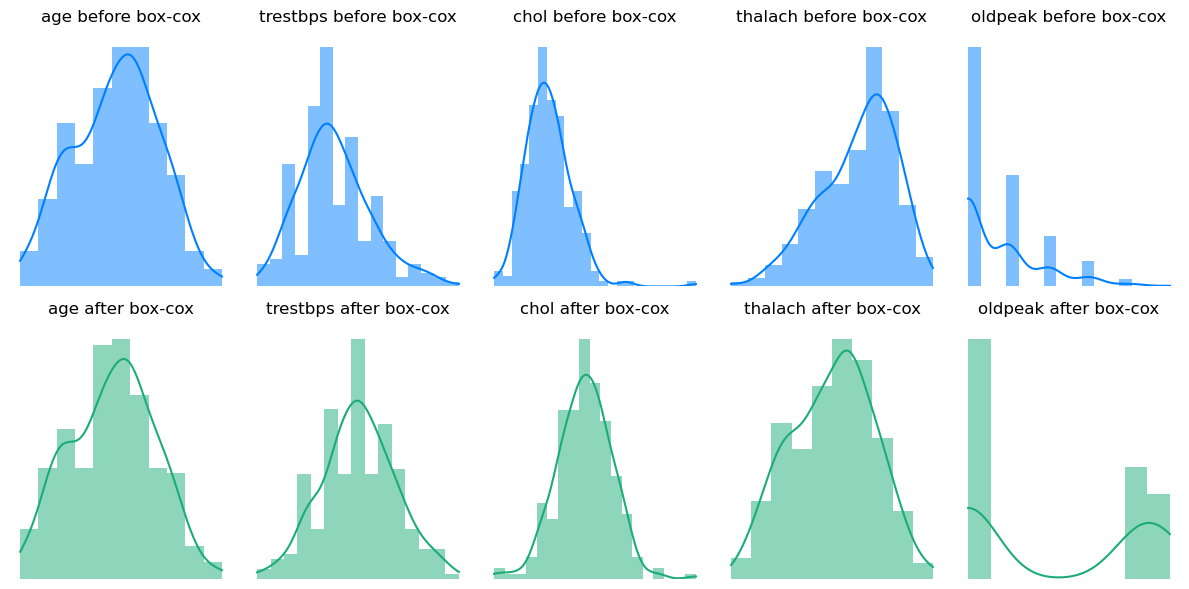

In [30]:
from scipy.stats import boxcox

# Generate the figure
fig, axes = plt.subplots(ncols=len(features_num), nrows=2, figsize=(12, 6))

# Seperate the top and bottom axes
axes_top, axes_bottom = axes

# Dict to store lambda values
lambdas = {}

# Loop through each feature and draw the original and transformed histograms
for feature, ax_top, ax_bottom in zip(features_num, axes_top, axes_bottom):
    # Extract the feature
    data = X_train[feature]

    # Draw the original histogram
    sns.histplot(data=data, kde=True, color=CustomColor.blue, ax=ax_top, edgecolor="None")

    ax_top.set_title(f"{feature} before box-cox", pad=10)

    # Obtain the transformed feature along w/ corresponding lambda
    X_train[feature], lambdas[feature] = boxcox(X_train[feature])

    # Apply transformation to test feature as wells
    X_test[feature] = boxcox(X_test[feature], lmbda=lambdas[feature])

    # Draw the new histogram
    sns.histplot(
        data=X_train[feature],
        kde=True,
        color=CustomColor.green,
        ax=ax_bottom,
        edgecolor="None",
    )

    ax_bottom.set_title(f"{feature} after box-cox", pad=10)

# Style the axes
for ax in axes.flatten():
    ax.spines[:].set_visible(False)
    ax.set_xticks((), ())
    ax.set_yticks((), ())
    ax.set_xlabel("")
    ax.set_ylabel("")


# Avoid any overlap
plt.tight_layout()

# Render the plot
plt.show()

<div style="font-size:15px; line-height:1.8;">

**Observations**

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br> 
        - ...
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br>
        - ...
    </p>
</ul>

</div>

<div style="font-size:15px; line-height:1.8;">

Let's go ahead and apply the boxcox transformation to the encoded dataframe.

</div>

In [32]:
data_SCALED = data_ENCODED.copy()

data_SCALED["oldpeak"] = data_SCALED["oldpeak"] + 0.001

for feature in features_num:
    data_SCALED[feature] = boxcox(data_SCALED[feature], lambdas[feature])

<h2 style="font-weight: bold; font-size: 22px;">3. Model Building</h2>

<hr style="
    border: none;
    height: 1px;
    background: black;
    "> 

<div style="font-size:15px; line-height:1.8;">

First, we'll create a series of custom classes and functions. Taking the time to set this up now will make the subsequent steps much smoother.

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;"><code style='font-size:14px; font-weight:bold;'>Model</code></li>
    <p>
        - This class will hold all the key properties of our model, like its name, the estimator itself, the parameters, validation scores, and test scores for any dataset it’s tested on. <br> 
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;"><code style='font-size:14px; font-weight:bold;'>grid_search()</code></li>
    <p>
        - A custom implementation, created as an alternative to sklearn's <code style='font-size:14px; font-weight:bold;'>GridSearchCV()</code><br>
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;"><code style='font-size:14px; font-weight:bold;'>model_specs()</code></li>
    <p>
        - Integrated into the above function. After the training is complete, we call this function to neatly display the optimal hyperparameters along with the best cross-validation scores. <br>
    </p>
</ul>

</div>

In [33]:
from utils.custom_classes import CustomModel
from utils.helpers import grid_search, model_specs

<div style="font-size:15px; line-height:1.8;">

When diagnosing patients, high recall (sensitivity) for the positive class is often more critical than precision. High recall ensures that most patients with the illness are correctly identified, even if some false positives occur. The reasoning is simple: it’s better to have a few false alarms—where healthy patients are mistakenly diagnosed as sick—than to risk missing a patient who actually has the illness. In medicine, overlooking a diagnosis can have serious consequences. Therefore, it’s generally more important to cast a wider net to identify those who may need treatment, even if it leads to additional follow-ups for false positives.

That said, we'll also track the F1 score to ensure the model achieves high recall without sacrificing precision. This balance is crucial to avoid overburdening the system or inconveniencing patients with excessive false positives.

</div>

In [34]:
models = []

<h3 style="font-weight: bold; font-size: 18px">A. Decision Trees</h3>

<div style="font-size:15px; line-height:1.8;">
    
**Train the Model**

</div>

In [37]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
model = CustomModel(name="Decision Tree", estimator=DecisionTreeClassifier())

# Set up hyperparamter grid for cross-validation
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 3],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2],
}

grid_search(model, param_grid, X_train, y_train, metrics=["recall", "f1"])

  0%|          | 0/24 [00:00<?, ?it/s]

•——————————————————————————————————————————•
| Decision Tree — Cross-Validation Results |
•——————————————————————————•———————————————•
|      Hyperparameter      |     Value     |
•——————————————————————————•———————————————•
|        criterion         |      gini     |
|        max_depth         |       3       |
|     min_samples_leaf     |       2       |
|    min_samples_split     |       2       |
•——————————————————————————•———————————————•
|      Scoring Metric      |   Value (%)   |
•——————————————————————————•———————————————•
|          recall          |     83.3 %    |
|            f1            |     80.5 %    |
•——————————————————————————•———————————————•


<div style="font-size:15px; line-height:1.8;">
    
**Evaluate Performance on Training & Testing Datasets**

</div>

In [38]:
# Evaluate on Training Data
scores = model.test(X_train, y_train)

# Style results
scores = scores.mul(100).round(2)
scores.columns = ["Precision", "Recall", "F1 Score"]
scores.index = list(ser_feature_encodings["target"]) + [scores.index[-1]]

# Display performance
scores

,Precision,Recall,F1 Score
Negative,84.54,74.55,79.23
Positive,80.69,88.64,84.48
weighted avg,82.44,82.23,82.09


In [39]:
# Evaluate on Testing Data
scores = model.test(X_test, y_test)

# Style results
scores = scores.mul(100).round(2)
scores.columns = ["Precision", "Recall", "F1 Score"]
scores.index = list(ser_feature_encodings["target"]) + [scores.index[-1]]

# Display performance
scores

,Precision,Recall,F1 Score
Negative,80.77,75.00,77.78
Positive,80.00,84.85,82.35
weighted avg,80.35,80.33,80.25


<div style="font-size:15px; line-height:1.8;">

**Observations**

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br> 
        - ...
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br>
        - ...
    </p>
</ul>

</div>

In [40]:
models.append(model)

<h3 style="font-weight: bold; font-size: 18px;">B. Random Forest</h3>

<div style="font-size:15px; line-height:1.8;">

**Train the Model**

</div>

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = CustomModel(name="Random Forest", estimator=RandomForestClassifier())

# Set up hyperparamter grid for cross-validation
# param_grid = {
#     "n_estimators": [10, 30, 50, 70, 100],
#     "criterion": ["gini", "entropy"],
#     "max_depth": [2, 3, 4],
#     "min_samples_split": [2, 3, 4, 5],
#     "min_samples_leaf": [1, 2, 3],
#     "bootstrap": [True, False],
# }
param_grid = {
    "n_estimators": [30],
    "criterion": ["gini"],
    "max_depth": [2],
    "min_samples_split": [2],
    "min_samples_leaf": [2],
    "bootstrap": [True],
}


grid_search(model, param_grid, X_train, y_train, metrics=["recall", "f1"])

  0%|          | 0/1 [00:00<?, ?it/s]

•——————————————————————————————————————————•
| Random Forest — Cross-Validation Results |
•——————————————————————————•———————————————•
|      Hyperparameter      |     Value     |
•——————————————————————————•———————————————•
|        bootstrap         |      True     |
|        criterion         |      gini     |
|        max_depth         |       2       |
|     min_samples_leaf     |       2       |
|    min_samples_split     |       2       |
|       n_estimators       |       30      |
•——————————————————————————•———————————————•
|      Scoring Metric      |   Value (%)   |
•——————————————————————————•———————————————•
|          recall          |     84.8 %    |
|            f1            |     82.7 %    |
•——————————————————————————•———————————————•


<div style="font-size:15px; line-height:1.8;">
    
**Evaluate Performance on Training & Testing Datasets**

</div>

In [43]:
# Evaluate on Training Data
scores = model.test(X_train, y_train)

# Style results
scores = scores.mul(100).round(2)
scores.columns = ["Precision", "Recall", "F1 Score"]
scores.index = list(ser_feature_encodings["target"]) + [scores.index[-1]]

# Display performance
scores

,Precision,Recall,F1 Score
Negative,84.62,80.00,82.24
Positive,84.06,87.88,85.93
weighted avg,84.31,84.30,84.25


In [44]:
# Evaluate on Testing Data
scores = model.test(X_test, y_test)

# Style results
scores = scores.mul(100).round(2)
scores.columns = ["Precision", "Recall", "F1 Score"]
scores.index = list(ser_feature_encodings["target"]) + [scores.index[-1]]

# Display performance
scores

,Precision,Recall,F1 Score
Negative,85.19,82.14,83.64
Positive,85.29,87.88,86.57
weighted avg,85.24,85.25,85.22


<div style="font-size:15px; line-height:1.8;">

**Observations**

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br> 
        - ...
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br>
        - ...
    </p>
</ul>

</div>

In [45]:
models.append(model)

<h3 style="font-weight: bold; font-size: 18px;">C. KNN</h3>

<div style="font-size:15px; line-height:1.8;">

Remember, K-Nearest Neighbors (KNN) is sensitive to the scale of the features, so it’s important to scale all the data for accurate results. To streamline this process, we’ll build a pipeline that automatically handles feature scaling for us.

</div>

<div style="font-size:15px; line-height:1.8;">

**Train the Model** 

</div>

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Set up the pipeline
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", KNeighborsClassifier()),
    ]
)

# Initialize the model
model = CustomModel(name="KNN", estimator=pipeline)

# Set up hyperparamter grid for cross-validation
param_grid = {
    "model__n_neighbors": list(range(1, 12)),
    "model__weights": ["uniform", "distance"],
    "model__p": [1, 2],  # 1: Manhattan distance, 2: Euclidean distance
}

grid_search(model, param_grid, X_train, y_train, metrics=["recall", "f1"])

  0%|          | 0/44 [00:00<?, ?it/s]

•————————————————————————————————•
| KNN — Cross-Validation Results |
•————————————————————•———————————•
|   Hyperparameter   |   Value   |
•————————————————————•———————————•
| model__n_neighbors |     9     |
|      model__p      |     2     |
|   model__weights   |  uniform  |
•————————————————————•———————————•
|   Scoring Metric   | Value (%) |
•————————————————————•———————————•
|       recall       |   84.1 %  |
|         f1         |   83.1 %  |
•————————————————————•———————————•


<div style="font-size:15px; line-height:1.8;">
    
**Evaluate Performance on Training & Testing Datasets**

</div>

In [47]:
# Evaluate on Training Data
scores = model.test(X_train, y_train)

# Style results
scores = scores.mul(100).round(2)
scores.columns = ["Precision", "Recall", "F1 Score"]
scores.index = list(ser_feature_encodings["target"]) + [scores.index[-1]]

# Display performance
scores

,Precision,Recall,F1 Score
Negative,82.14,83.64,82.88
Positive,86.15,84.85,85.50
weighted avg,84.33,84.30,84.31


In [48]:
# Evaluate on Testing Data
scores = model.test(X_test, y_test)

# Style results
scores = scores.mul(100).round(2)
scores.columns = ["Precision", "Recall", "F1 Score"]
scores.index = list(ser_feature_encodings["target"]) + [scores.index[-1]]

# Display performance
scores

,Precision,Recall,F1 Score
Negative,82.76,85.71,84.21
Positive,87.50,84.85,86.15
weighted avg,85.32,85.25,85.26


<div style="font-size:15px; line-height:1.8;">

**Observations**

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br> 
        - ...
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br>
        - ...
    </p>
</ul>

</div>

In [49]:
models.append(model)

<h3 style="font-weight: bold; font-size: 18px;">D. SVMs</h3>

<div style="font-size:15px; line-height:1.8;">

**Train the Model**

</div>

In [50]:
from sklearn.svm import SVC

# Set up the pipeline
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", SVC(probability=True)),
    ],
)

# Initialize the model
model = CustomModel(name="SVM", estimator=pipeline)

# Initialize paramters for hyper-tuning
param_grid = {
    "model__C": [0.0011, 0.005, 0.01, 0.05, 0.1, 1, 10, 20],
    "model__kernel": ["linear", "rbf", "poly"],
    "model__gamma": ["scale", "auto", 0.1, 0.5, 1, 5],
    "model__degree": [2, 3, 4],
}

grid_search(model, param_grid, X_train, y_train, metrics=["recall", "f1"])

  0%|          | 0/432 [00:00<?, ?it/s]

•————————————————————————————————•
| SVM — Cross-Validation Results |
•——————————————————•—————————————•
|  Hyperparameter  |    Value    |
•——————————————————•—————————————•
|     model__C     |     0.1     |
|  model__degree   |      2      |
|   model__gamma   |    scale    |
|  model__kernel   |     rbf     |
•——————————————————•—————————————•
|  Scoring Metric  |  Value (%)  |
•——————————————————•—————————————•
|      recall      |   100.0 %   |
|        f1        |    73.6 %   |
•——————————————————•—————————————•


<div style="font-size:15px; line-height:1.8;">
    
**Evaluate Performance on Training & Testing Datasets**

</div>

In [51]:
# Evaluate on Training Data
scores = model.test(X_train, y_train)

# Style results
scores = scores.mul(100).round(2)
scores.columns = ["Precision", "Recall", "F1 Score"]
scores.index = list(ser_feature_encodings["target"]) + [scores.index[-1]]

# Display performance
scores

,Precision,Recall,F1 Score
Negative,96.88,28.18,43.66
Positive,62.38,99.24,76.61
weighted avg,78.06,66.94,61.63


In [52]:
# Evaluate on Testing Data
scores = model.test(X_test, y_test)

# Style results
scores = scores.mul(100).round(2)
scores.columns = ["Precision", "Recall", "F1 Score"]
scores.index = list(ser_feature_encodings["target"]) + [scores.index[-1]]

# Display performance
scores

,Precision,Recall,F1 Score
Negative,100.00,28.57,44.44
Positive,62.26,100.00,76.74
weighted avg,79.59,67.21,61.92


<div style="font-size:15px; line-height:1.8;">

**Observations**

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br> 
        - ...
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br>
        - ...
    </p>
</ul>

</div>

In [53]:
models.append(model)

<h2 style="font-weight: bold; font-size: 22px;">4. Model Selection & Finalization</h2>

<hr style="
    border: none;
    height: 1px;
    background: black;
    "> 

<h3 style="font-weight: bold; font-size: 18px;">A. Compare Models</h3>

<div style="font-size:15px; line-height:1.8;">

To reiterate, in the context of diagnosing heart disease, our main objective is to achieve high recall for the positive class, ensuring we don’t miss any potential cases. However, we also need to be mindful of not overwhelming the system with false alarms, which could cause unnecessary inconvenience for healthy individuals. With that in mind, let's plot the performance of our models to compare how they each handle this balance. We'll concentrate on the performance metrics for the positive class.

</div>

In [54]:
# Create an empty DataFrame
frame = pd.DataFrame(
    columns=["model", "recall", "f1"],
    index=range(len(models)),
)

# Loop through each model and add its name and scores to the DataFrame
for i, model in enumerate(models):
    frame.at[i, "model"] = model.name
    frame.at[i, "recall"] = model.test_scores.loc["1", "recall"] * 100
    frame.at[i, "f1"] = model.test_scores.loc["1", "f1-score"] * 100

# Round to 1 decimal place
frame[["recall", "f1"]] = frame[["recall", "f1"]].astype(float).round(1)

# Verify results
frame

,model,recall,f1
0,Decision Tree,84.8,82.4
1,Random Forest,87.9,86.6
2,KNN,84.8,86.2
3,SVM,100.0,76.7


<div style="font-size:15px; line-height:1.8;">

**Using Pandas**

</div>

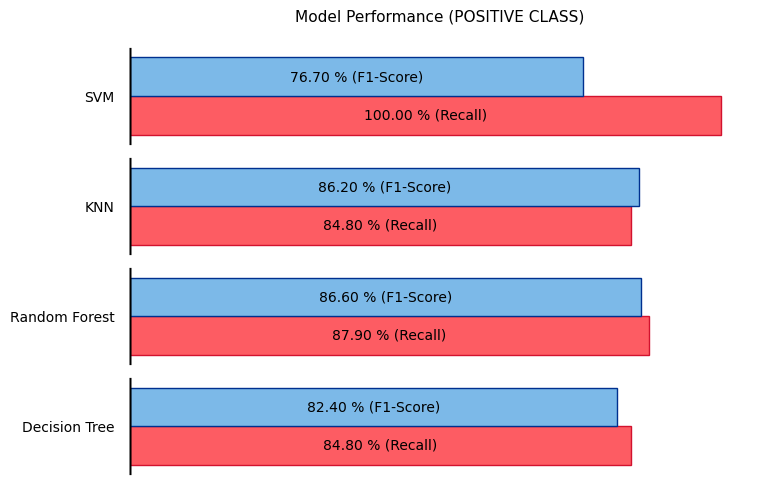

In [55]:
# Create the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Construct the plot
frame.plot(kind="barh", ax=ax, legend=False, width=0.7, color=[CustomColor.light_red, CustomColor.light_blue])

# Remove the spines
ax.spines[["top", "bottom", "right"]].set_visible(False)

# Remove the y ticks and labels
ax.set_xticks((), ())

# Update x tick labels
ax.set_yticks(ax.get_yticks(), frame["model"])

# Move x ticks to the left
# ax.spines["left"].set_position(("outward", 10))

# Pad the tick labels on the y axis
ax.yaxis.set_tick_params(pad=10)

# Remove x ticks
ax.tick_params(direction="inout", length=2, width=70)

# Label each bar
ax.bar_label(ax.containers[0], label_type="center", fmt=lambda x: f"{x:.2f} % (Recall)")
ax.bar_label(ax.containers[1], label_type="center", fmt=lambda x: f"{x:.2f} % (F1-Score)")

# Remove the y axis
ax.spines["left"].set_visible(False)

# Set title
ax.set_title("Model Performance (POSITIVE CLASS)", size=11)

# Set the edge color for recall bars
for bar in ax.containers[0]:
    bar.set_edgecolor(CustomColor.dark_red)

for bar in ax.containers[1]:
    bar.set_edgecolor(CustomColor.dark_blue)

# Render the plot
plt.show()

<div style="font-size:15px; line-height:1.8;">

**Using Seaborn**

</div>

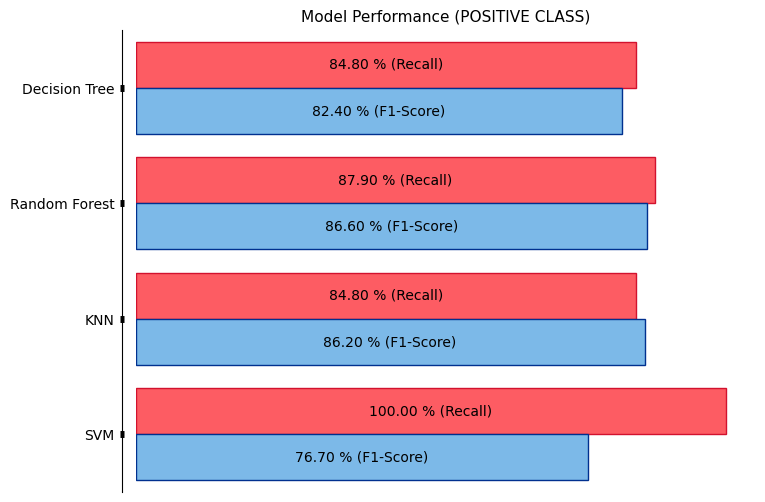

In [56]:
# Massage the datum into long format
frame_sea = frame.melt(
    id_vars="model",
    value_vars=["recall", "f1"],
    var_name="metric",
    value_name="score",
)

# Create the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Construct the plot
sns.barplot(
    data=frame_sea,
    y="model",
    x="score",
    hue="metric",
    # palette=[TColor.light_red, TColor.light_blue],
    legend=False,
    ax=ax,
)

# Remove the spines
ax.spines[["top", "bottom", "right"]].set_visible(False)

# Remove the y ticks and labels
ax.set_xticks((), ())

# Update x tick labels
ax.set_yticks(ax.get_yticks(), frame["model"])

# Move x ticks to the left
ax.spines["left"].set_position(("outward", 10))

# Remove x ticks
ax.tick_params(direction="inout", length=3, width=5)

# label each bar
ax.bar_label(ax.containers[0], label_type="center", fmt=lambda x: f"{x:.2f} % (Recall)")
ax.bar_label(ax.containers[1], label_type="center", fmt=lambda x: f"{x:.2f} % (F1-Score)")

# Remove x and y labelse
ax.set_xlabel("")
ax.set_ylabel("")

# Set the edge color for recall bars
for bar in ax.containers[0]:
    bar.set_facecolor(CustomColor.light_red)
    bar.set_edgecolor(CustomColor.dark_red)

for bar in ax.containers[1]:
    bar.set_facecolor(CustomColor.light_blue)
    bar.set_edgecolor(CustomColor.dark_blue)

# Set title
ax.set_title("Model Performance (POSITIVE CLASS)", size=11)

plt.show()

<div style="font-size:15px; line-height:1.8;">

**Observations**

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br> 
        - ...
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br>
        - ...
    </p>
</ul>

</div>

<h3 style="font-weight: bold; font-size: 18px;">B. Build Pipeline</h3>

<div style="font-size:15px; line-height:1.8;">

Before saving our models, we need to set up the right pipeline. Since all our models were trained on processed data, we must apply those same transformations to any new data we use in the future. Otherwise, the model won’t perform as expected.

Manually applying these transformations every time can be tedious—that’s where pipelines come in. A pipeline lets us bundle our model with a series of preprocessing steps, ensuring that raw data is automatically transformed before being fed into the model. From the user’s perspective, they just provide the raw data, and the pipeline takes care of the rest.

</div>

<div style="font-size:15px; line-height:1.8;">
    
Since all our models require transforming numerical features with Box-Cox and encoding specific categorical variables, we’ll start by creating these two preprocessors as a single reusable component. Fortunately, we can use the built-in <code style='font-size:14px; font-weight:bold;'>OneHotEncoder</code> for encoding categorical variables. However, since scikit-learn doesn’t provide a built-in transformer for the Box-Cox transformation, we’ll need to implement our own.

</div>

In [57]:
from utils.custom_classes import CustomBoxCoxTransformer

<div style="font-size:15px; line-height:1.8;">
    
Moreover, since the transformations to numerical and categorical columns are independent, we can apply both simultaneously. This is achieved using scikit-learn’s <code style='font-size:14px; font-weight:bold;'>ColumnTransformer</code> class.

</div>

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

numeric_features = features_num
numeric_transformer = Pipeline(steps=[("boxcoxer", CustomBoxCoxTransformer())])

categorical_features = list(features_to_encode)
categorical_transformer = Pipeline(steps=[("encoder", OneHotEncoder(handle_unknown="ignore", drop="first"))])

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("num", numeric_transformer, numeric_features),
    ],
    remainder="passthrough",
    force_int_remainder_cols=False,
)

<div style="font-size:15px; line-height:1.8;">
    
Now, let's rebuild our previous models with the updated architecture. One important thing to note is that the feature order has changed. Previously, our models were trained with the encoded features at the end of the DataFrame, but with <code style='font-size:14px; font-weight:bold;'>OneHotEncoder()</code>, the encoded features are placed at the front. Because of this, we'll need to retrain our models to ensure they work with the new feature order.

</div>

In [63]:
data

269    1.001
191    2.001
15     1.001
224    2.001
250    4.001
       ...  
142    0.001
33     0.001
181    1.001
262    2.001
54     0.001
Name: oldpeak, Length: 242, dtype: float64

In [64]:
# Importing the required module from scikit-learn
from sklearn.pipeline import Pipeline

# Initialize an empty dictionary to store updated models
models_updated = {}

# Prepare the features and target variables from the dataset
features = data_RAW.drop(columns="target")  # Dropping the target column for the features
target = data_RAW["target"].astype(int)  # Converting target to integer type

# Loop through each model in the 'models' list
for model in models:
    # Generate a lowercase, underscored name for the model
    name = model.name.lower().replace(" ", "_")

    # Extract the estimator (the machine learning model) from the model object
    estimator = model.estimator

    # Create a pipeline with the preprocessor and the model estimator
    pipeline = Pipeline([("preprocessor", preprocessor), ("estimator", estimator)])

    # Fit the pipeline to the features and target
    pipeline.fit(features, target)

    # Store the fitted pipeline in the dictionary with the model name as the key
    models_updated[name] = pipeline

<div style="font-size:15px; line-height:1.8;">
    
We can now save our models.

</div>

In [65]:
import pickle
from pathlib import Path

# Define the directory where models will be saved
dir_ = Path("classifiers")

# Create the directory if it doesn't exist (including any necessary parent directories)
dir_.mkdir(parents=True, exist_ok=True)

# Loop through each model in the 'models_updated' dictionary
for name, estimator in models_updated.items():
    # Generate a filename for each model, replacing spaces with hyphens and converting to lowercase
    filename = f"{name.lower().replace('_', '-')}.pkl"

    # Save the model as a .pkl file in the specified directory
    # 'pickle.dumps' serializes the model, and 'write_bytes' writes the serialized model to the file
    Path(dir_ / filename).write_bytes(pickle.dumps(estimator))

<h2 style="font-weight: bold; font-size: 22px; margin-bottom: 10px;">5. Model Usage</h2>

<hr style="
    border: none;
    height: 1px;
    background: black;
    "> 

<h3 style="font-weight: bold; font-size: 18px; margin-bottom: 10px;">A. Web App</h3>

<h3 style="font-weight: bold; font-size: 18px; margin-bottom: 10px;">B. CSV Files</h3>

<h3 style="font-weight: bold; font-size: 18px; margin-bottom: 10px;">C. API</h3>